# Prédiction de la réussite d'un niveau de jeu avec Scikit-Learn

Dans cet exercice, nous allons entraîner un modèle de Machine Learning avec Scikit-Learn pour prédire si un joueur terminera un niveau en fonction de ses performances.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    

## 1. Génération des données simulées

In [2]:

def generate_game_data(n_samples=1000):
    np.random.seed(42)
    data = {
        'temps_de_jeu': np.random.randint(30, 300, n_samples),  # Temps en secondes
        'ennemis_tues': np.random.randint(0, 50, n_samples),  # Nombre d'ennemis éliminés
        'bonus_collectes': np.random.randint(0, 10, n_samples),  # Nombre de bonus collectés
        'sauts_effectues': np.random.randint(10, 100, n_samples),  # Nombre de sauts effectués
        'niveau_reussi': np.random.choice([0, 1], n_samples, p=[0.4, 0.6])  # 0 = échec, 1 = réussite
    }
    return pd.DataFrame(data)

df = generate_game_data()
df.head()
    

,temps_de_jeu,ennemis_tues,bonus_collectes,sauts_effectues,niveau_reussi
0,132,41,0,79,1
1,136,21,6,36,0
2,101,20,4,11,1
3,218,26,0,47,1
4,50,30,5,12,1


## 2. Analyse des données

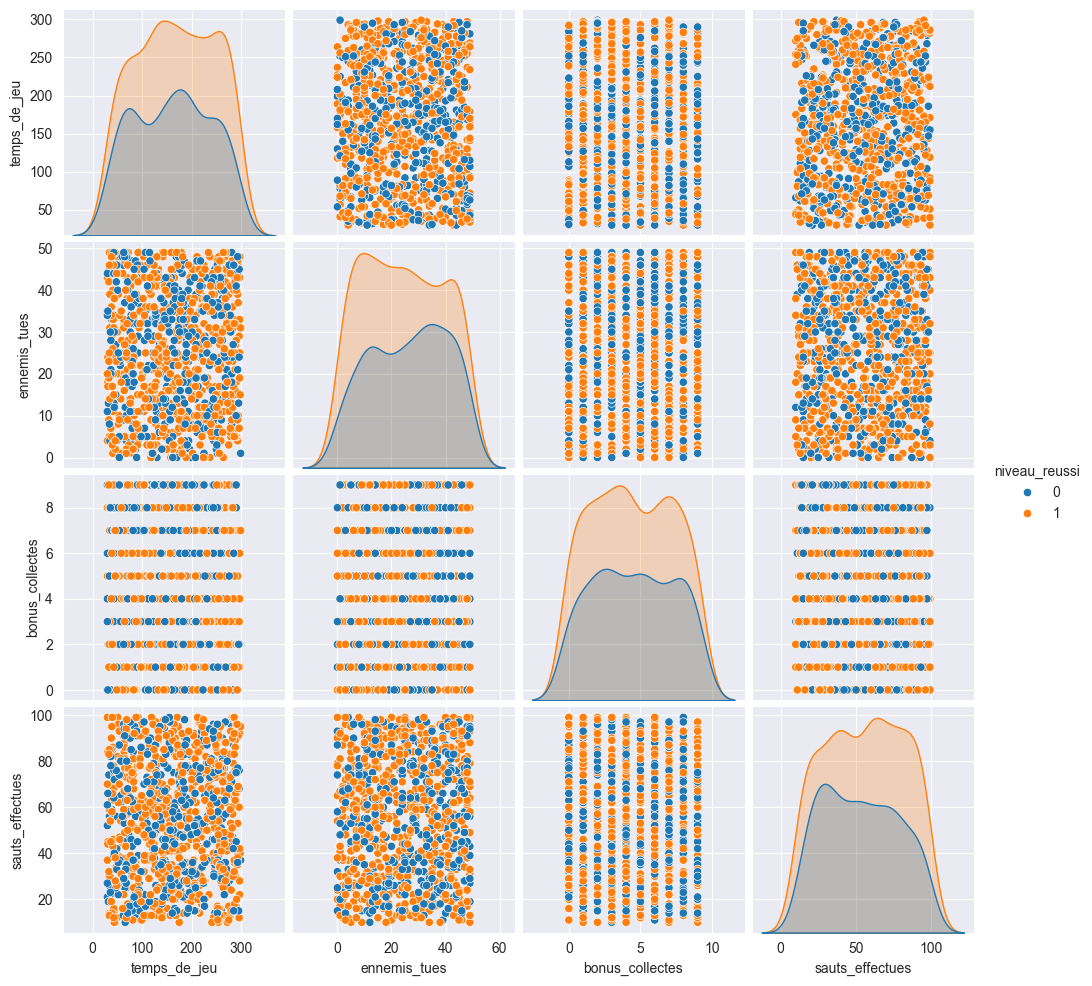

In [3]:

sns.pairplot(df, hue='niveau_reussi')
plt.show()
    

## 3. Préparation des données

In [4]:

X = df.drop(columns=['niveau_reussi'])  # Features
y = df['niveau_reussi']  # Target

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    

## 4. Entraînement du modèle

In [5]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
    

RandomForestClassifier(random_state=42)

## 5. Évaluation du modèle

Accuracy Score: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.26      0.30        73
           1       0.63      0.73      0.68       127

    accuracy                           0.56       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.53      0.56      0.54       200



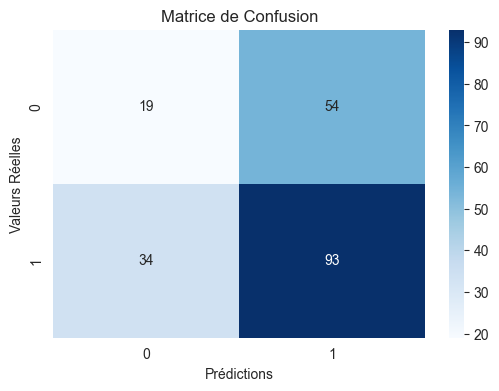

In [6]:

y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion")
plt.show()
    

## 6. Prédiction sur de nouvelles données

In [8]:
# Création d'un joueur fictif
nouveau_joueur = np.array([[120, 15, 3, 50]])  # Exemple de statistiques d'un joueur

# Transformer en DataFrame avec les bonnes colonnes
nouveau_joueur_df = pd.DataFrame(nouveau_joueur, columns=X.columns)

# Appliquer la mise à l'échelle
nouveau_joueur_scaled = scaler.transform(nouveau_joueur_df)

# Prédiction avec le modèle entraîné
resultat = model.predict(nouveau_joueur_scaled)

print("Le modèle prédit que le joueur", "réussira" if resultat[0] == 1 else "échouera", "le niveau.")

Le modèle prédit que le joueur réussira le niveau.
